1.Convoultional Nueral Network for Fashion clothing

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as k
from keras.datasets import fashion_mnist


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

Text(0.5, 1.0, '2')

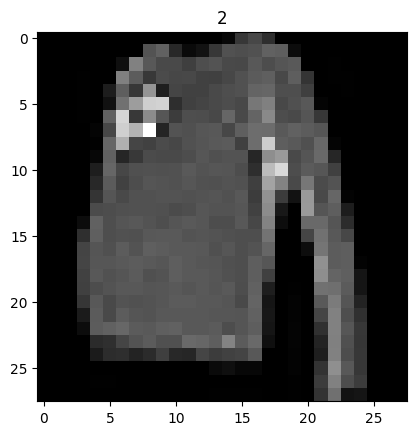

In [11]:
plt.imshow(x_test[600],cmap=plt.get_cmap('gray'))
plt.title(y_test[600])

In [172]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [145]:
num_labels = len(np.unique(y_train))

In [187]:
num_labels

10

In [12]:
print('Train:X=%s,y=%s' %(x_train.shape,y_train.shape))

Train:X=(60000, 28, 28),y=(60000,)


0: T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat 5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot

Plot first few images

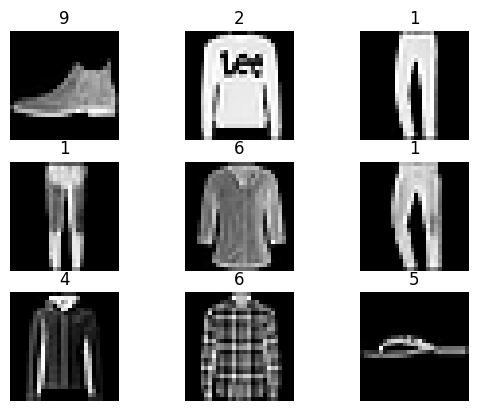

In [3]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
  plt.title(y_test[i])
  plt.axis('off')
 

Prepare the image dataset
Here is a basic approach to applying a CNN on the MNIST dataset using the Python programming language and the Keras library:
1.Load and preprocess the data: The MNIST dataset can be loaded using the Keras library, and the images can be normalized to have pixel values between 0 and 1.
2.Define the model architecture: The CNN can be constructed using the Keras Sequential API, which allows for easy building of sequential models layer-by-layer. The architecture should typically include convolutional layers, pooling layers, and fully-connected layers.
3.Compile the model: The model needs to be compiled with a loss function, an optimizer, and a metric for evaluation.
4.Train the model: The model can be trained on the training set using the Keras fit() function. It is important to monitor the training accuracy and loss to ensure the model is converging properly.
5.Evaluate the model: The trained model can be evaluated on the test set using the Keras evaluate() function. The evaluation metric typically used for classification tasks is accuracy.

Reshape the dataset to have single channel

In [127]:
x_train.shape[0]

60000

In [12]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)

In [13]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [80]:
num_labels=10

In [14]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

# Prepare pixel data
we should normalize the pixel values of grayscale image and rescale them to be in range 0 to 1

In [15]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

Define Model
Explanation of the working of each layer in the CNN model:
layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3).
layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3).
layer3 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3).
layer4 is showing Dropout at a rate of 0.5.
layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6.
layer6 is a hidden layer of a neural network containing 250 neurons.
layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D, MaxPooling2D,Input

In [18]:
model=Sequential()

In [157]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=((3,3))))
model.add(Conv2D(64,(2,2),activation='sigmoid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=((3,3))))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compile the Model


In [135]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [159]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=200)

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.4437 - loss: 1.6627 - val_accuracy: 0.7856 - val_loss: 0.5677
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7933 - loss: 0.5365 - val_accuracy: 0.7938 - val_loss: 0.5193
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8302 - loss: 0.4456 - val_accuracy: 0.8263 - val_loss: 0.4543
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8485 - loss: 0.3960 - val_accuracy: 0.8525 - val_loss: 0.3901
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8616 - loss: 0.3648 - val_accuracy: 0.8700 - val_loss: 0.3481
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8721 - loss: 0.3340 - val_accuracy: 0.8724 - val_loss: 0.3372
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8764 - loss: 0.3269 - val_accuracy: 0.8717 - val_loss: 0.3454
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.8852 - loss: 0

Text(0.5, 1.0, 'Training loss per epoch')

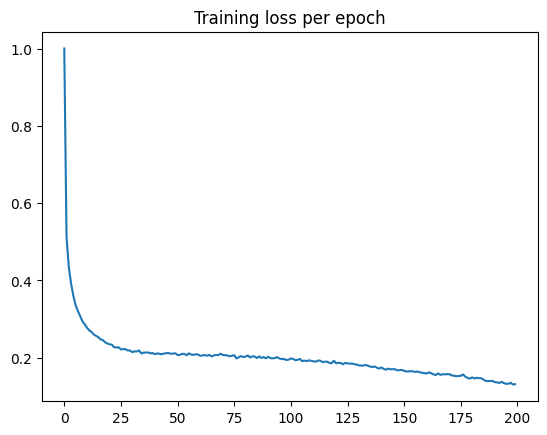

In [280]:
import seaborn as sns
sns.lineplot(x=range(len(loss)),y=loss)
plt.title('Training loss per epoch')

In [163]:
model.metrics_names

['loss', 'compile_metrics']

In [164]:
training_score=model.evaluate(x_train,y_train,verbose=0)
print(training_score)

[0.07497042417526245, 0.9755833148956299]


In [165]:
test_score=model.evaluate(x_test,y_test,verbose=0)

In [166]:
print(test_score)

[0.2928001284599304, 0.9179999828338623]


In [167]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [168]:
test_prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [169]:
model.save('final_model_fash.h5')

# How To make Prediction
1.load the image
2.convert the image to array
3.reshape the single sample with 1-channel
4.prepare the pixel data
5.make prediction

In [45]:
from keras.models import load_model
from numpy import argmax
import cv2
from keras.preprocessing.image import load_img,img_to_array
from keras.optimizers import SGD

In [140]:
model=load_model('final_model_fash.h5')

In [141]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [142]:
def predict(filename):
    img=cv2.imread(filename,0)
    img=cv2.resize(img,(28,28))
    img=np.asarray(img)
    img=img.astype('float32')
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    img=np.vstack([img])
    img=np.reshape(img,(1,28,28))
    pred=model.predict(img)
    pred=argmax(pred)
    
    return pred
    
    

In [143]:
predict('shoes.jpg')
# I gave shoes but it gave label of Pullover

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


2

In [51]:
predict('sand.png')
# gave sandal image and lable it 5 and it is correct

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


5

In [53]:
predict('t-sh.jpeg')
# we gave t-shirt and gave us a right label 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


6

In [56]:
predict('sweater.jpeg')
#we have sweater and gave us a label shirt just related

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


6

In [ ]:
#N.B:- I train the model with epochs=200 and gave shoes prediction but it gave us a pullover 

In [58]:
predict('bag.jpg')
#we gave bag and gave us a right label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


8

In [60]:
predict('trouser.jpg')
#we gave trouser and gave us a label shirt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


6

In [62]:
predict('trouser.jpeg')
#we gave short and gave us a label bag

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


8

In [66]:
predict('pullover.jpg')
#we gave pullover and gave us a label shirt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


6

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [24]:
from tensorflow.keras.layers import BatchNormalization

N.B:-let us create more better model

In [19]:
model_2=Sequential()

In [25]:
model_2.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(Conv2D(64,(3,3),activation='sigmoid',input_shape=(28,28,1)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=((3,3))))
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(250,activation='relu'))
model_2.add(Dense(100,activation='relu'))
model_2.add(Dense(100,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(10,activation='softmax'))


In [26]:
model_2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_2.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=100)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 424ms/step - accuracy: 0.9082 - loss: 0.2434 - val_accuracy: 0.4290 - val_loss: 2.1448
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 422ms/step - accuracy: 0.9124 - loss: 0.2333 - val_accuracy: 0.3247 - val_loss: 6.0772
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 422ms/step - accuracy: 0.9142 - loss: 0.2304 - val_accuracy: 0.1209 - val_loss: 17.5732
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 425ms/step - accuracy: 0.9172 - loss: 0.2214 - val_accuracy: 0.2621 - val_loss: 12.0104
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 424ms/step - accuracy: 0.9180 - loss: 0.2195 - val_accuracy: 0.1813 - val_loss: 23.5320
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 422ms/step - accuracy: 0.9179 - loss: 0.2149 - val_accuracy: 0.4582 - val_loss: 5.3322
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 422ms/step - accuracy: 0.9220 - loss: 0.2095 - val_accuracy: 0.1000 - val_loss: 36.6366
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 422ms/step - accura

In [161]:
model_2.save('revised_model.h5')

In [162]:
model_rev=load_model('revised_model.h5')

In [163]:
def predict_1(filename):
    img=cv2.imread(filename,0)
    img=cv2.resize(img,(28,28))
    img=np.asarray(img)
    img=img.astype('float32')
    img=img/255.0
    img=np.expand_dims(img,axis=0)
    img=np.vstack([img])
    img=np.reshape(img,(1,28,28))
    pred=model_rev.predict(img)
    pred=argmax(pred)
    
    return pred
    
    

In [164]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model_rev.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [165]:
predict_1('trouser.jpg')
#we gave trouser and gave us a label shirt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


2

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [166]:
predict_1('shoes.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


0

In [176]:
predict_1('bag.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


8

In [175]:
predict_1('shoes.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


8

In [173]:
predict_1('pullover.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


6

In [174]:
predict_1('sand.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


5

N.B:we try to use different time of optimization from using simple convolution layer to a convolution layer with many neuron with different training epochs such as 100,200,400..the quality of image is a great problem for the model 
to correct classify a given set of picture and it is an ongoing process. The use different activation function is also can help to improve the model performance in slight way, but still now I ddidn't get a desired result from the model
and keep different optimization techniques in both the digit data set as well as digit data set.